<a href="https://colab.research.google.com/github/Meitiann/INF2008-ML-Labs/blob/main/INF2008_Lab_03_2302073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF2008 Lab 03

In this lab, we will be implementing a few algorithms from scratch. The goal of the lab (as well as other labs) is to help you gain a deep understanding of implementing and training neural network models so try to understand every single line of the code.


**[IMPORTANT] Lab Instruction**
1. Save a copy of the notebook to your Google Drive, rename it to INF2008_Lab_assignment01_`<Your_STUDENT_ID>`.ipynb
2. Fill in your `STUDENT_ID` in the notebook
3. Implement the lines with `#TODO` comments
4. **DO NOT** change any given code and comments

**[IMPORTANT] Submission Instruction**
1. After completing this notebook, please download the completed lab as a `.py` file (File > Download > Download .py)
<img src="https://drive.google.com/uc?id=1NAUZVnIbiJsiK-lrCKcPyYWQoDlkh6kw"
alt="altertext" width="400">
2. **Only submit the `.py` file to Dubmit the `.py` file to dropbox [W3-P*-assignments] by 2 Feb**




In [ ]:
import sys

STUDENT_ID = ""  # Make sure you submit the correct student ID, e.g. STUDENT_ID="1234567"

if STUDENT_ID == "":
  print("Warning: STUDENT_ID is empty. Please enter your student ID before starting!")
  sys.exit()
else:
  print("Your student ID is %s, please ensure you typed the correct student ID"%STUDENT_ID)

SystemExit: 

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


*   1 Normalization
*   2 Create a simple MLP in pytorch
*   3 Creation of Activation Functions


We first create the sample data. Here we will just be making a very simple 2 dimensional dataset.

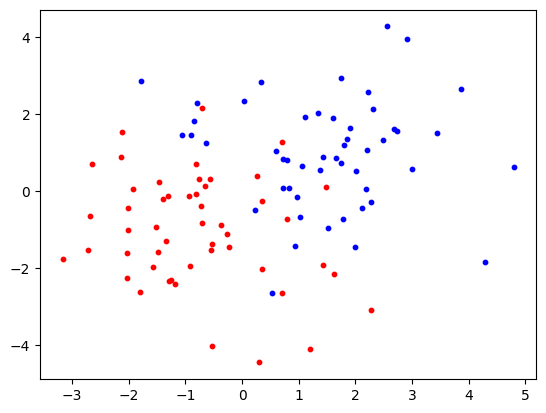

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [(-1, -1), (1, 1)]
cluster_std = [1.5, 1.5]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

We split it into the train test datasets so that everybody is using exactly the same data points.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

View the training data

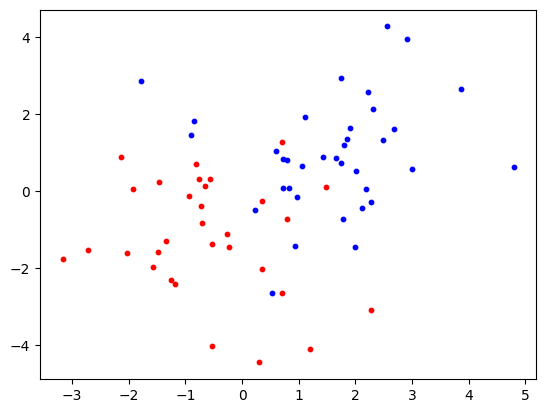

In [ ]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", s=10, label="Cluster2")

View the testing data.

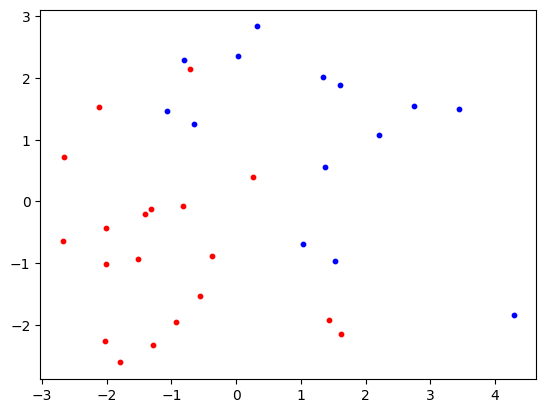

In [ ]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="blue", s=10, label="Cluster2")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1 Normalization

First we have to normalize the data properly. We normalize the data by using the following formula:



$X_{train} = \frac{X_{train} - \bar{X}_{train}}{\sigma_{X_{train}}}$

$X_{test} = \frac{X_{test} - \bar{X}_{train}}{\sigma_{X_{train}}}$



These are the first three lines of $X_{train}$

```
[-0.85682268,  1.03978436],
[ 0.23370412, -0.7659015 ],
[ 0.99482891,  0.0611624 ],
```

These are the first three lines of $X_{test}$

```
[-1.19657104, -0.08841231],
[-0.77660018,  1.22014734],
[-0.73311504,  0.7220799 ],
```

Write a function that normalizes the training and testing data according to the formula provided above.

Expected output:
```
STD before normalization
X_train:  [1.63869787 1.79957369]
X_test:  [1.76751798 1.59554563]

STD after normalization
X_train:  [1. 1.]
X_test:  [1.07861126 0.88662422]
```

Write a function that normalizes the training and testing data according to the formula provided above.

In [ ]:
### Before normalization ###
print("STD before normalization")
print("X_train: ", X_train.std(axis=0))
print("X_test: ", X_test.std(axis=0))

### TODO: Normalize the training and testing data.
mu, sigma = #TODO
X_train_norm = #TODO
X_test_nrom = #TODO

### After normalization ###
print()
print("STD after normalization")
print("X_train: ", X_train_norm.std(axis=0))
print("X_test: ", X_test_nrom.std(axis=0))

# Note: in practice, you should keep the original tensors.
# For simplicity, we will reuse the variables and replace with the normalised values.
X_train, X_test = X_train_norm, X_test_nrom

STD before normalization
X_train:  [1.63869787 1.79957369]
X_test:  [1.76751798 1.59554563]

STD after normalization
X_train:  [1. 1.]
X_test:  [1.07861126 0.88662422]


#### 2 Create a simple MLP in pytorch.

You can refer to the following tutorial for help:
https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Since we are going to use pytorch, convert the data to pytorch tensors.

In [ ]:
import torch

In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

Create a tensor dataset together with a dataloader of batch size of 8. The shuffle of the dataloader for the training data should be true, and that of the test should be false.

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets
train_dataset = #TODO
test_dataset = #TODO

# Create DataLoader
batch_size = 8
train_loader = #TODO
test_loader = #TODO

Check if the following properties match the desired ones

```
Properties of train/test datasets
Train dataset length: 67
First element of train dataset: (tensor([-0.8568,  1.0398]), tensor(1))
Test dataset length: 33
First element of test dataset: (tensor([-1.1966, -0.0884]), tensor(0))

 Properties of loaders
Number of batches in train loader: 9
Batch size in train loader: 8
Number of batches in test loader: 5
Batch size in test loader: 8
```

In [ ]:
# Properties of train and test datasets
print("Properties of train/test datasets")
print("Train dataset length:", len(train_dataset))
print("First element of train dataset:", train_dataset[0])
print("Test dataset length:", len(test_dataset))
print("First element of test dataset:", test_dataset[0])

# Properties of train and test loader
print("\n Properties of loaders")
print("Number of batches in train loader:", len(train_loader))
print("Batch size in train loader:", train_loader.batch_size)
print("Number of batches in test loader:", len(test_loader))
print("Batch size in test loader:", test_loader.batch_size)

Properties of train/test datasets
Train dataset length: 67
First element of train dataset: (tensor([-0.8568,  1.0398]), tensor(1))
Test dataset length: 33
First element of test dataset: (tensor([-1.1966, -0.0884]), tensor(0))

 Properties of loaders
Number of batches in train loader: 9
Batch size in train loader: 8
Number of batches in test loader: 5
Batch size in test loader: 8


Create and instantiate a MLP class. It should have just two functions, the __init__ function and the forward function.

The MLP should have the following parameters:

*   Layer 1 (input layer): input 2, output 64
*   RELU
*   Layer 2 (hidden layer): input 64, output 32
*   RELU
*   Layer 3 (output layer): input 32, output 2

In [ ]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self):
        #TODO

    def forward(self, x):
        #TODO

model = MLP().to(device)

# Print model architecture
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)

Set the optimizer to SGD with learning rate of 0.01. The loss should be CrossEntropyLoss


In [ ]:
optimizer = #TODO
criterion = #TODO

# Properties of optimizer and criterion
print("Properties of optimizer and criterion:")
print("Optimizer:", optimizer)
print("Criterion:", criterion)

Properties of optimizer and criterion:
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Criterion: CrossEntropyLoss()


Now we need to run the training loop. Set the number of epochs to be 100. After which we run the following for each epoch.

**Question 1: You may get different loss values for each epoch, why?**

**Question 2: Why is there no softmax?**



In [ ]:
# Training loop
num_epochs = 100
logs = []
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        #TODO
    if epoch % 20 == 0:
        #TODO


Epoch 1/100, Loss: 0.681739091873169
Epoch 21/100, Loss: 0.29990410804748535
Epoch 41/100, Loss: 0.6456886529922485
Epoch 61/100, Loss: 0.12474963068962097
Epoch 81/100, Loss: 0.0795564129948616


Now we carry out an evaluation of the model based on the test set. The steps are the following:



```
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        # set the forward pass
        # get the predicted values
        # get the number of observations in batch
        # get the number of correct predictions

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')
```

Do note that to get the prediction, it will find out which index position is larger and set it to the correspnding index. An example:

*   [1.5, -0.5] will set the prediction to 0.
*   [0.5, 3.5] will set the prediction to 1.
*   [0.5, -3.5] will set the prediction to 0.


In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        #TODO

mlp_accuracy = correct / total
print(f'Test Accuracy: {mlp_accuracy * 100:.2f}%')

Test Accuracy: 93.94%


#### 3 Creation of Activation Functions (6 marks)

Create three classes, each class depicting one activation function, sigmoid, tanh and relu.

```
class Sigmoid():
    def __init__(self):
        return

    def forward(self, x):
        sigmoid_x = todo
        return sigmoid_x

    def derivative(self):
        return todo
```



The formulas are below:

$sigmoid(z) = \frac{1}{1+e^{-z}}$

$sigmoid.derivative() = sigmoid(z) - sigmoid(z)^2$

$tanh(z) = \frac{sinh(z)}{cosh(z)}$

$tanh.derivative(z) = 1 - tanh^2(z)$

$relu(z) = max(z, 0)$

$relu.derivative(z) = 1$ if $z \gt 0$

$relu.derivative(z) = 0$ if $z \leq 0$



In [ ]:
import numpy as np
class Sigmoid():
    def __init__(self):
        return

    def forward(self, x):
       #TODO
        return #TODO

    def derivative(self):
        return #TODO

In [ ]:
class Tanh():
    def __init__(self):
        return

    def forward(self, x):
        #TODO
        return #TODO

    def derivative(self):
        return #TODO

In [ ]:
class ReLU():

    def __init__(self):
        return

    def forward(self, x):
        #TODO
        return #TODO

    def derivative(self):
        return #TODO

In [ ]:
sample_data = X_train[:5]
print(sample_data)

[[-0.85682268  1.03978436]
 [ 0.23370412 -0.7659015 ]
 [ 0.99482891  0.0611624 ]
 [ 1.4878883   0.34141449]
 [-0.68994128  0.20731248]]


In [ ]:
sigmoid = Sigmoid()
sample_data_sigmoid_forward = sigmoid.forward(sample_data)
print(sample_data_sigmoid_forward)

[[0.29800361 0.7388084 ]
 [0.55816155 0.31736636]
 [0.73004067 0.51528583]
 [0.81576111 0.58453408]
 [0.33404614 0.55164329]]


In [ ]:
sample_data_sigmoid_derivative = sigmoid.derivative()
print(sample_data_sigmoid_derivative)

[[0.20919746 0.19297055]
 [0.24661723 0.21664495]
 [0.19708129 0.24976634]
 [0.15029492 0.24285399]
 [0.22245932 0.24733297]]


In [ ]:
sample_data = X_train[:5]
tanh = Tanh()

sample_data_tanh_forward = tanh.forward(sample_data)
print(sample_data_tanh_forward)

[[-0.69461701  0.7778029 ]
 [ 0.22954028 -0.64453992]
 [ 0.75941386  0.06108625]
 [ 0.90293544  0.32873961]
 [-0.59794427  0.20439267]]


In [ ]:
sample_data_tanh_derivative = tanh.derivative()
print(sample_data_tanh_derivative)

[[0.51750721 0.39502265]
 [0.94731126 0.58456829]
 [0.42329059 0.99626847]
 [0.1847076  0.89193027]
 [0.64246264 0.95822363]]


In [ ]:
sample_data = X_train[:5]
relu = ReLU()

sample_data_relu_forward = relu.forward(sample_data)
print(sample_data_relu_forward)

[[0.         1.03978436]
 [0.23370412 0.        ]
 [0.99482891 0.0611624 ]
 [1.4878883  0.34141449]
 [0.         0.20731248]]


In [ ]:
sample_data_relu_derivative = relu.derivative()
print(sample_data_relu_derivative)

[[0. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]]
